# 단순 선형회귀

### 1. 아버지와 아들의 키 - Galton

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌하고 단위를 cm으로 변환

In [5]:
df = df[df.Gender == 'M']
height = df[['Father', 'Height']].rename(columns = {'Height':'Son'})
height.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [6]:
height = height * 2.54
height.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


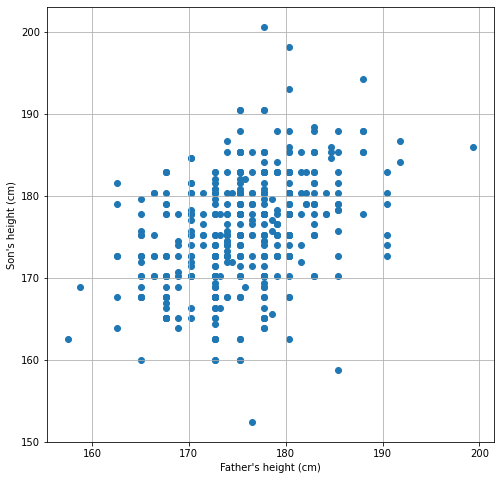

In [8]:
plt.figure(figsize=(8, 8))
plt.scatter(height.Father, height.Son)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

- Numpy 최소 자승법을 이용해서 회귀선 구하기

In [9]:
A = np.vstack([height.Father, np.ones(len(height.Father))]).T
A.shape

(465, 2)

In [10]:
height.Father.shape

(465,)

In [12]:
reg = np.linalg.lstsq(A, height.Son, rcond=None)
reg  # 0.44774792 : 기울기, 97.17763701 : 절편

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [13]:
# 기울기와 절편
m, c = reg[0]

In [14]:
# 잔차 제곱의 합(Residual Sum of Square)
rss = reg[1][0]

In [16]:
m, c, rss

(0.44774791760302285, 97.1776370073939, 17556.599515494014)

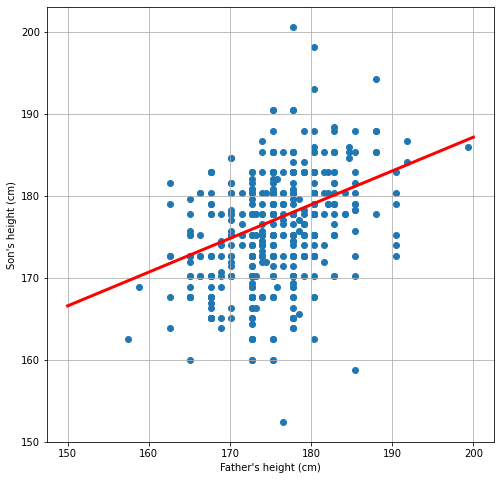

In [21]:
plt.figure(figsize=(8, 8))
plt.scatter(height.Father, height.Son)
plt.plot([150, 200], [m*155+c, m*201+c], 'r', lw=3)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

- Scikit-Learn

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
height.Father.values.shape

(465,)

In [25]:
X = height.Father.values.reshape(-1,1)
y = height.Son.values

In [26]:
X.shape, y.shape

((465, 1), (465,))

In [29]:
lr = LinearRegression()
lr.fit(X, y)  # X는 2D Array 이어야 함

LinearRegression()

lr.coef_ : 기울기 / lr.intercept_ : 절편

In [30]:
weight, bias = lr.coef_, lr.intercept_
rss = lr._residues
weight[0], bias, rss

(0.4477479176030255, 97.17763700739346, 17556.59951549399)

In [31]:
# R squared 값 (R 제곱)
lr.score(X, y)

0.15312927478306992